<a href="https://colab.research.google.com/github/RodrigoBarbosaa/Flight_Status_Prediction/blob/random-forest-diagnosis/voos_branch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight delay analysis**

In this project, we intend to use data analytics to find the correlation existent between flight delays (specific to 2021's USA flight data) and multiple factors, especially during high season for travelling, where there is an increased demand for flight booking. This is part of the Introdutcion to Data Science (Advanced Topics in Data and Information Management) course, by Luciano Barbosa at CIn, Federal University of Pernambuco.

## Who are we?
[Mariana Amorim](https://github.com/mrbsa) and [Rodrigo Barbosa](https://github.com/RodrigoBarbosaa), students of Information Systems @ Centro de Informática, UFPE, and data enthusiasts.

## Sources

The database is a courtesy of Rob Mulla @ Kaggle. You can find it [here](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022/data?select=readme.md).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

## Importando o Dataset e Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import zscore

In [ ]:
pip install scikit-learn

In [ ]:
flights = pd.read_csv("/content/drive/MyDrive/Combined_Flights_2021 2.csv", encoding = "ISO-8859-1")

In [ ]:
flights.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CRSDepTime,DepTime,CRSElapsedTime,ActualElapsedTime,CRSArrTime,ArrTime
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,0.0,False,724,714.0,79.0,64.0,843,818.0
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,0.0,False,922,917.0,78.0,74.0,1040,1031.0
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,0.0,False,1330,1321.0,180.0,160.0,1530,1501.0
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,0.0,False,1645,1636.0,145.0,146.0,2010,2002.0
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,0.0,False,1844,1838.0,101.0,85.0,1925,1903.0


In [ ]:
print(flights.columns)

Index(['Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin',
       'OriginCityName', 'Dest', 'DestCityName', 'DepDelayMinutes',
       'ArrDelayMinutes', 'Cancelled', 'CRSDepTime', 'DepTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'CRSArrTime', 'ArrTime'],
      dtype='object')


# Filtrando o Dataset para análise

Como queremos trabalhar com a probabilidade de um voo atrasar na saída (Depature) e fornecer esse tempo de atraso, decidimos filtrar apenas as colunas envolvidas para análise. Nesse caso, são: **'Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin','OriginCityName', 'DestCityName', 'Dest', 'DepDelayMinutes', 'Cancelled' **

In [ ]:
depature_db = flights[['Airline', 'FlightDate', 'Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'OriginCityName', 'Dest', 'DestCityName', 'DepDelayMinutes', 'Cancelled' ]]

In [ ]:
depature_db.head(10)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,Cancelled
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,False
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,False
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,False
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,False
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,False
5,SkyWest Airlines Inc.,2021-03-03,3,3,3,ORD,"Chicago, IL",BNA,"Nashville, TN",0.0,False
6,SkyWest Airlines Inc.,2021-03-03,3,3,3,PSP,"Palm Springs, CA",PHX,"Phoenix, AZ",0.0,False
7,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",YUM,"Yuma, AZ",0.0,False
8,SkyWest Airlines Inc.,2021-03-03,3,3,3,LBB,"Lubbock, TX",PHX,"Phoenix, AZ",0.0,False
9,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",DRO,"Durango, CO",0.0,False


In [ ]:
depature_db.describe()

,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,6.311871e+06,6.311871e+06,6.311871e+06,6.203458e+06
mean,6.969905e+00,1.579259e+01,4.013676e+00,1.276132e+01
std,3.300914e+00,8.786535e+00,2.006264e+00,4.736319e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,1.000000e+01,2.300000e+01,6.000000e+00,6.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,3.095000e+03


In [ ]:
# existem informações faltantes em DepDelayMinutes

In [ ]:
depature_db.isnull().sum()

Airline                 0
FlightDate              0
Month                   0
DayofMonth              0
DayOfWeek               0
Origin                  0
OriginCityName          0
Dest                    0
DestCityName            0
DepDelayMinutes    108413
Cancelled               0
dtype: int64

In [ ]:
# encontrar motivo das informações serem nulas

In [ ]:
depature_db.loc[pd.isnull(depature_db["DepDelayMinutes"])]

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,Cancelled
93,SkyWest Airlines Inc.,2021-03-18,3,18,4,MKE,"Milwaukee, WI",DFW,"Dallas/Fort Worth, TX",NaN,True
94,SkyWest Airlines Inc.,2021-03-18,3,18,4,DTW,"Detroit, MI",ORD,"Chicago, IL",NaN,True
95,SkyWest Airlines Inc.,2021-03-18,3,18,4,MDT,"Harrisburg, PA",ORD,"Chicago, IL",NaN,True
98,SkyWest Airlines Inc.,2021-03-18,3,18,4,TVC,"Traverse City, MI",ORD,"Chicago, IL",NaN,True
99,SkyWest Airlines Inc.,2021-03-18,3,18,4,ORD,"Chicago, IL",MSP,"Minneapolis, MN",NaN,True
...,...,...,...,...,...,...,...,...,...,...,...
6310286,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,BTR,"Baton Rouge, LA",IAH,"Houston, TX",NaN,True
6310305,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,DEN,"Denver, CO",SGF,"Springfield, MO",NaN,True
6310313,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,IAH,"Houston, TX",CLL,"College Station/Bryan, TX",NaN,True
6310315,"Commutair Aka Champlain Enterprises, Inc.",2021-06-03,6,3,4,IAH,"Houston, TX",AEX,"Alexandria, LA",NaN,True


Após o filtro de informações nulas em "DepDelayMinutes", percebemos que os voos cancelados não possuem tempo de atraso, e a informação encontra-se como nula.

Na nossa análise, não queremos abordar voos cancelados. Apenas a previsão de atraso. Dessa maneira, decidimos excluir os voos que foram cancelados, igualando a quantidade dos dados.

In [ ]:
df_voos_realizados = depature_db[depature_db['Cancelled'] != True]
df_voos_realizados .drop('Cancelled', axis=1, inplace=True);

<ipython-input-15-05758a55f9bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados .drop('Cancelled', axis=1, inplace=True);


In [ ]:
df_voos_realizados.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0


In [ ]:
df_voos_realizados.shape[0]

6200853

In [ ]:
df_voos_realizados.describe()

,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,6.200853e+06,6.200853e+06,6.200853e+06,6.200853e+06
mean,6.971930e+00,1.578955e+01,4.014590e+00,1.273993e+01
std,3.297374e+00,8.786934e+00,2.003839e+00,4.729205e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,1.000000e+01,2.300000e+01,6.000000e+00,6.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,3.095000e+03


In [ ]:
# Agora, todos os campos estão preenchidos

#Visualização de atraso dos voos realizados

In [ ]:
media = df_voos_realizados["DepDelayMinutes"].mean()
mediana = df_voos_realizados["DepDelayMinutes"].median()
dp = df_voos_realizados["DepDelayMinutes"].std()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio padrão: {dp}")

Média: 11.564061431065925
Mediana: 0.0
Desvio padrão: 34.283634493213896


Visualização da distribuição dos minutos de atraso

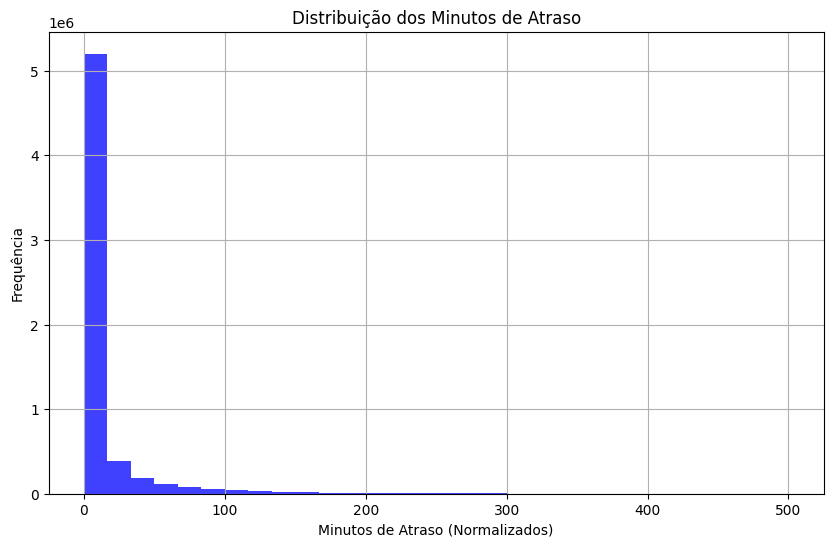

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_voos_realizados['DepDelayMinutes'], bins=30, alpha=0.75, color='blue')
plt.title('Distribuição dos Minutos de Atraso')
plt.xlabel('Minutos de Atraso')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

Visualização entre **voos atrasados** e **total de voos**

<ipython-input-18-0a17ed67820d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['FlightDate'] = pd.to_datetime(df_voos_realizados['FlightDate']);
<ipython-input-18-0a17ed67820d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_voos_realizados['IsDelayed'] = df_voos_realizados['DepDelayMinutes'] > 0;


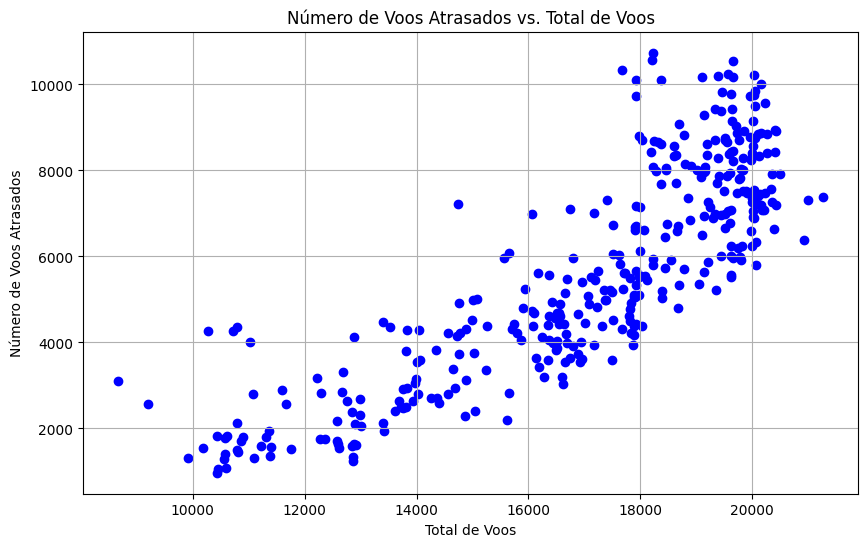

In [ ]:
df_voos_realizados['FlightDate'] = pd.to_datetime(df_voos_realizados['FlightDate']);
df_voos_realizados['IsDelayed'] = df_voos_realizados['DepDelayMinutes'] > 0;

# Agrupando e contando os voos por data
grouped = df_voos_realizados.groupby('FlightDate').agg(Total_Voos=('DepDelayMinutes', 'size'), Voos_Atrasados=('IsDelayed', 'sum')).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped['Total_Voos'], grouped['Voos_Atrasados'], color='blue')
plt.title('Número de Voos Atrasados vs. Total de Voos')
plt.xlabel('Total de Voos')
plt.ylabel('Número de Voos Atrasados')
plt.grid(True)
plt.show()

In [ ]:
#Com essa visualização, já é possivel identificar uma correlação positiva entre o número de voos e a quantidade de atrasos.

# Filtrando apenas voos atrasados

Seguindo, vamos analisar a proporção de atrasos com a quantidade de voos por mês. No primeiro passo, separamos o total de voos na variável "voos_mes", em seguida, iremos filtrar o dataset com apenas os voos atrasados, entender seus dados, e tirar a proporção (%atrasos/mês)

In [ ]:
voos_mes = df_voos_realizados.groupby('Month').size()

# Imprimir o resultado
print(voos_mes)

Month
1     375229
2     329969
3     461222
4     471375
5     517709
6     564583
7     605508
8     592760
9     560140
10    582759
11    573134
12    566465
dtype: int64


In [ ]:
# Filtrando Dataset apenas voos atrasados

In [ ]:
df = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] > 0]

In [ ]:
df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed
10,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",FAR,"Fargo, ND",2.0,True
12,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",8.0,True
36,SkyWest Airlines Inc.,2021-03-03,3,3,3,FSM,"Fort Smith, AR",DFW,"Dallas/Fort Worth, TX",22.0,True
37,SkyWest Airlines Inc.,2021-03-03,3,3,3,FLG,"Flagstaff, AZ",DFW,"Dallas/Fort Worth, TX",9.0,True
51,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",FLG,"Flagstaff, AZ",148.0,True


In [ ]:
df.shape[0]

2054071

# Entendendo os dados de atraso

Medidas de valor central:

In [ ]:
media = df["DepDelayMinutes"].mean()
mediana = df["DepDelayMinutes"].median()
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 35.01173859512384
Mediana: 16.0


Medidas de dispersão

In [ ]:
dp = df["DepDelayMinutes"].std()
variancia = df["DepDelayMinutes"].var()
print(f"Desvio padrão: {dp}")
print(f"Variância: {variancia}")

Desvio padrão: 52.322452179307085
Variância: 2737.639002055877


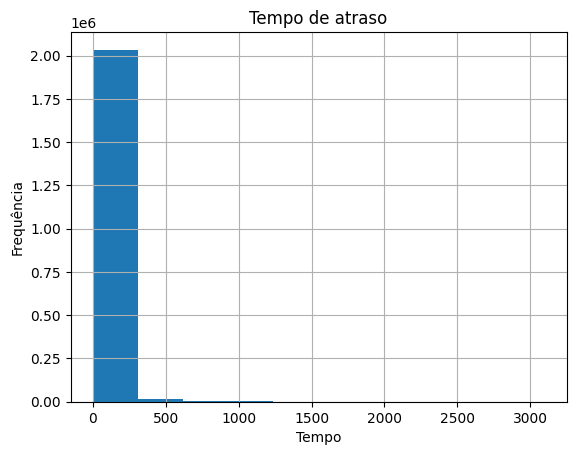

In [ ]:
df["DepDelayMinutes"].hist()

plt.title('Tempo de atraso')
plt.ylabel('Frequência')
plt.xlabel('Tempo')
plt.show()

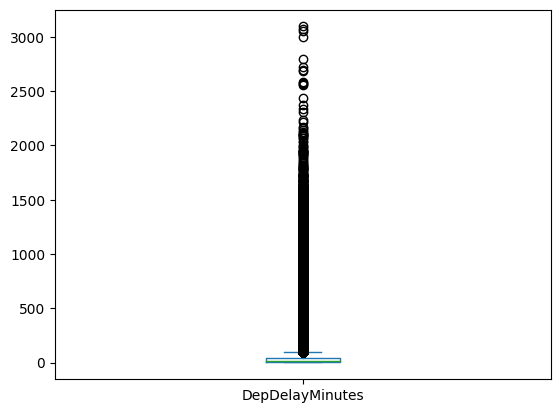

In [ ]:
df['DepDelayMinutes'].plot(kind="box")
plt.show()

Analisando o Histograma e o Boxplot, percebemos que o dataset dá a entender que voos remarcados são voos atrasados. Ex: voos com mais de 24h de atraso. Para nossa análise, decidimos considerar atrasos de até 8 horas (aproximadamente 500 minutos).

In [ ]:
# excluindo voos com mais de 500 minutos de atraso

In [ ]:
df = df[df['DepDelayMinutes'] <= 500]
df_voos_realizados = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] <= 500]

In [ ]:
# verificando o tempo de atraso máximo (é esperado 500)

df["DepDelayMinutes"].max()

500.0

Novo Boxplot

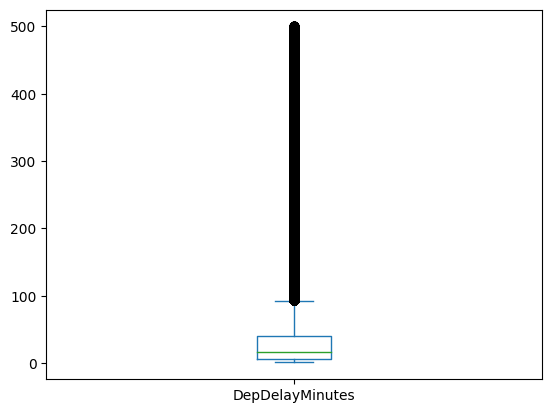

In [ ]:
df['DepDelayMinutes'].plot(kind="box")
plt.show()

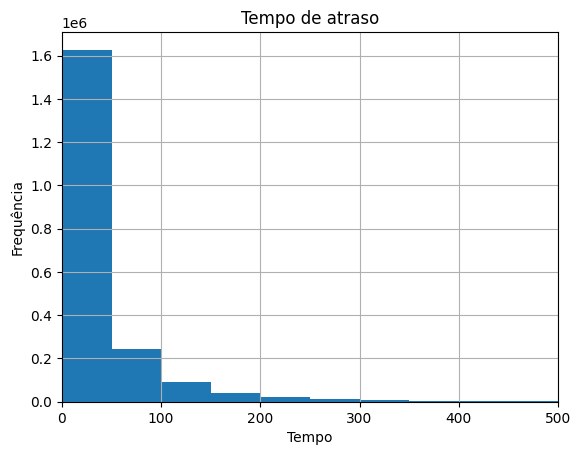

In [ ]:
df["DepDelayMinutes"].hist()
plt.xlim(0, 500)
plt.title('Tempo de atraso')
plt.ylabel('Frequência')
plt.xlabel('Tempo')
plt.show()

In [ ]:
# Analisando o dataset final de atraso após os filtros

In [ ]:
df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,IsDelayed
10,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",FAR,"Fargo, ND",2.0,True
12,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",8.0,True
36,SkyWest Airlines Inc.,2021-03-03,3,3,3,FSM,"Fort Smith, AR",DFW,"Dallas/Fort Worth, TX",22.0,True
37,SkyWest Airlines Inc.,2021-03-03,3,3,3,FLG,"Flagstaff, AZ",DFW,"Dallas/Fort Worth, TX",9.0,True
51,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",FLG,"Flagstaff, AZ",148.0,True


In [ ]:
df.describe()

,FlightDate,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,2045134,2.045134e+06,2.045134e+06,2.045134e+06,2.045134e+06
mean,2021-08-01 15:14:13.012076032,7.526333e+00,1.599738e+01,4.092283e+00,3.501174e+01
min,2021-01-01 00:00:00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2021-06-02 00:00:00,6.000000e+00,9.000000e+00,2.000000e+00,6.000000e+00
50%,2021-08-02 00:00:00,8.000000e+00,1.600000e+01,4.000000e+00,1.600000e+01
75%,2021-10-19 00:00:00,1.000000e+01,2.400000e+01,6.000000e+00,4.100000e+01
max,2021-12-31 00:00:00,1.200000e+01,3.100000e+01,7.000000e+00,5.000000e+02
std,NaN,3.041059e+00,8.753209e+00,2.025543e+00,5.232245e+01


Medidas de valor central e Dispersão

In [ ]:
media = df["DepDelayMinutes"].mean()
mediana = df["DepDelayMinutes"].median()
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Média: 35.01173859512384
Mediana: 16.0


In [ ]:
dp = df["DepDelayMinutes"].std()
variancia = df["DepDelayMinutes"].var()

print(f"Desvio padrão: {dp}")
print(f"Variância: {variancia}")

Desvio padrão: 52.322452179307085
Variância: 2737.639002055877


In [ ]:
assimetria = df['DepDelayMinutes'].skew()
curtose = df['DepDelayMinutes'].kurtosis()

print('Assimetria:', assimetria)
print('Curtose:', curtose)

Assimetria: 3.316280521696013
Curtose: 14.853017111189047


In [ ]:
# Mediana continua igual, media, desvio padrão e variância menores. Mudanças esperadas após remover outliers

In [ ]:
# Assimetria e Curtose esperadas pela visualização do histograma.

# Correlação Atraso X Mês

Uma das grandes causas dos atrasos percebidos nos aeroportos, é causado pelo aumento do tráfego aéreo, principalmente nos meses de alta temporada e meses festivos. A partir disso, queremos analisar se esse ponto de vista procede. Então analisaremos a correlação entre porcentagem de atrasos (atraso/total voos) por Mês.

In [ ]:
df_voos_realizados = df_voos_realizados[df_voos_realizados['DepDelayMinutes'] <= 500]

df_voos_realizados['Atrasado'] = df_voos_realizados['DepDelayMinutes'] > 0

atrasos_mes = df_voos_realizados[df_voos_realizados['Atrasado']].groupby("Month").size()

proporcao_atraso = atrasos_mes / voos_mes

resultado = pd.DataFrame({
    'Total Voos': voos_mes,
    'Voos Atrasados': atrasos_mes,
    'Proporção Atrasos': proporcao_atraso
})

resultado.head(12)

,Total Voos,Voos Atrasados,Proporção Atrasos
Month,,,
1,375229,65349,0.174158
2,329969,77344,0.234398
3,461222,103029,0.223383
4,471375,110796,0.235049
5,517709,149481,0.288736
6,564583,236585,0.419044
7,605508,264797,0.437314
8,592760,237444,0.400574
9,560140,163762,0.292359


Analisando a matriz de correlação geral

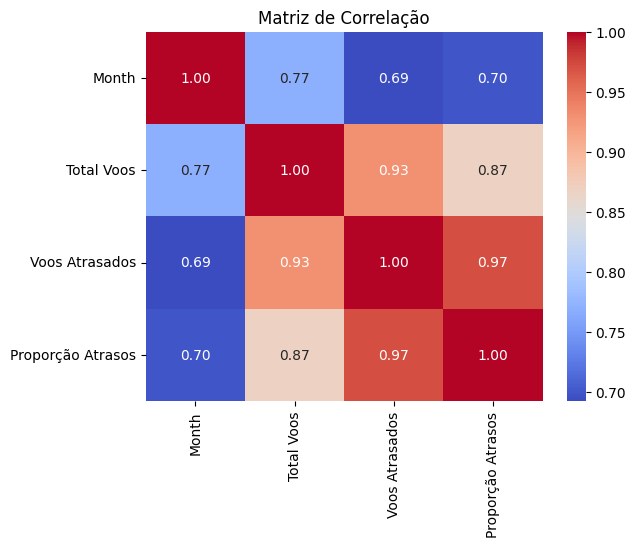

In [ ]:
# Calculando a matriz de correlação
resultado_novo = resultado.reset_index()

correlation_matrix = resultado_novo.corr(method='spearman')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Com essa visualização, conseguimos identificar diversas correlações, com destaque a "Total de voos" x "Voos atrasados", e "Proporção de atrasos" x "Total de voos".

Analisando e testando com mais detalhes a Proporção de Atraso por mês:

<ipython-input-21-a483f7fd429c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Proporção Atrasos', data=resultado_novo, palette='coolwarm')


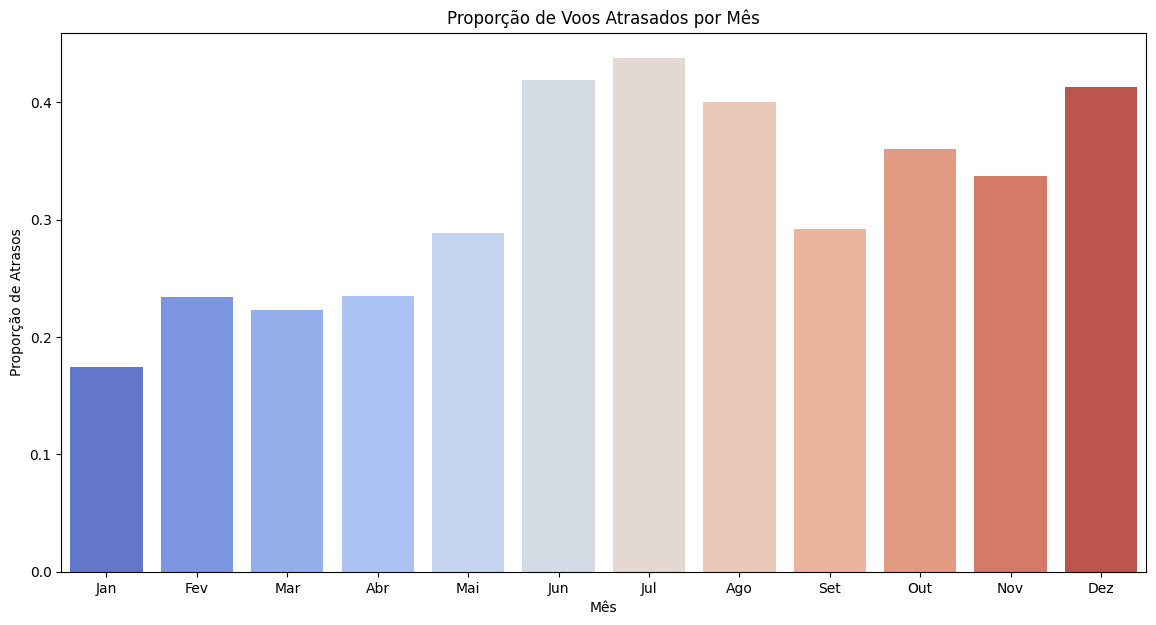

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Proporção Atrasos', data=resultado_novo, palette='coolwarm')
plt.title('Proporção de Voos Atrasados por Mês')
plt.xlabel('Mês')
plt.ylabel('Proporção de Atrasos')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])  # Adicionar nomes de meses para clareza
plt.show()


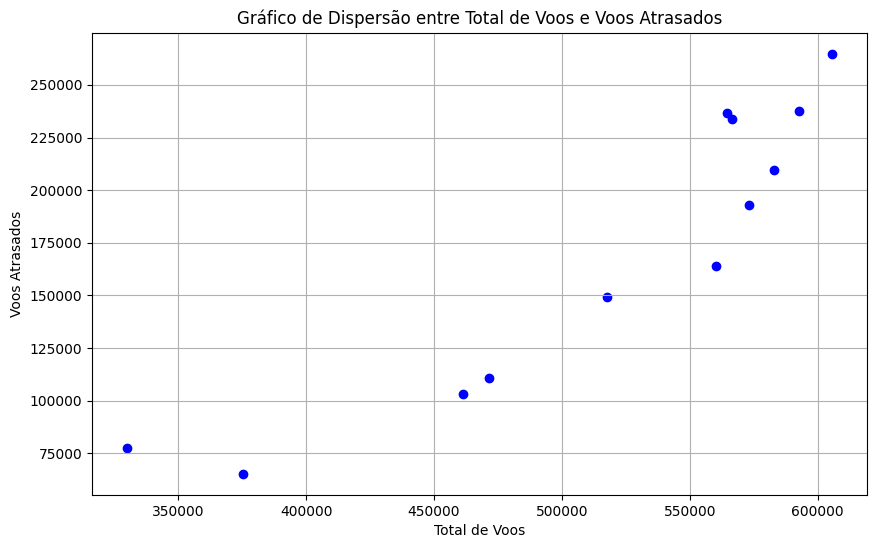

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(resultado['Total Voos'], resultado['Voos Atrasados'], color='blue')
plt.title('Gráfico de Dispersão entre Total de Voos e Voos Atrasados')
plt.xlabel('Total de Voos')
plt.ylabel('Voos Atrasados')
plt.grid(True)
plt.show()

In [ ]:
# Matriz de correlação Total Voos x Proporção de atraso:

In [ ]:
df_correlacao = resultado_novo[["Total Voos", "Proporção Atrasos"]]
df_correlacao.corr(method='spearman')

,Total Voos,Proporção Atrasos
Total Voos,1.000000,0.867133
Proporção Atrasos,0.867133,1.000000


In [ ]:
# Resultado da correlação de Spearman = 0.867133

Sendo assim, temos certeza de que a alta quantidade de voos implica em mais atrasos. Considerando que meses de alta temporada possuem mais voos, consequentemente possuem mais atrasos, mesmo que proporcionalmente, em virtude do aumento da demanda.

# Teste de Hipótese

Para o teste de hipótese, queremos confirmar Formalmente a Correlação entre Voos atrasados e Meses de alta temporada.

Utilizaremos o teste de correlação de Spearman. Este é um teste não paramétrico que mede a força e a direção da associação entre duas variáveis ranqueadas.

Este teste avalia se as diferenças observadas nas medianas dos grupos são grandes o suficiente para serem consideradas estatisticamente significativas, ou se elas poderiam ter ocorrido ao acaso.

Assim, veremos se as variações nas proporções de atrasos ao longo dos meses são consistentes ou se algumas flutuações específicas indicam mudanças significativas.

**Hipótese Nula (H0)**: Não existe correlação entre o total de voos e a proporção de voos atrasados.

**Hipótese Alternativa (H1)**: Existe uma correlação entre o total de voos e a proporção de voos atrasados.


Se o p-valor > 0.05: Aceitamos a hipótese nula (H0), indicando que não há evidência estatística suficiente para afirmar que existe uma correlação entre o total de voos e a proporção de voos atrasados.

Se o p-valor < 0.05: Rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1), sugerindo que existe uma correlação estatística significativa entre o total de voos e a proporção de voos atrasados.


In [ ]:
from scipy.stats import spearmanr

# Spearman's correlation test
correlation, p_value = spearmanr(resultado_novo['Total Voos'], resultado_novo['Proporção Atrasos'])

print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman Correlation Coefficient: 0.8671328671328673
P-value: 0.00025981184986148103


In [ ]:
# Hipotese nula rejeitada, Hipotese alternativa Aceita

# Discretização

In [ ]:
# Definindo os intervalos de atraso
bins = [-1, 0, 30, 60, float('inf')]
labels = ['Sem Atraso', 'Atraso Leve', 'Atraso Moderado', 'Atraso Grave']

df_voos_realizados['CategoriaAtraso'] = pd.cut(df_voos_realizados['DepDelayMinutes'], bins=bins, labels=labels)

df_voos_realizados.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,CategoriaAtraso
0,SkyWest Airlines Inc.,2021-03-03,3,3,3,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,Sem Atraso
1,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,Sem Atraso
2,SkyWest Airlines Inc.,2021-03-03,3,3,3,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,Sem Atraso
3,SkyWest Airlines Inc.,2021-03-03,3,3,3,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,Sem Atraso
4,SkyWest Airlines Inc.,2021-03-03,3,3,3,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,Sem Atraso


# Inputação de dados ausentes

Como nosso dataset não possui dados "sujos" ou ausentes, resolvemos extrair uma amostra dos dados, apagar aleatoriamente 15% dos valores de "DepDelayMinutes", e inputa-los utilizando o KNN. A razão por utilizar uma amostra dos dados se resume à capacidade computacional, visto que nosso dataset de atrasos possui aproximadamente 6.000.000 milhões de linhas, assim, inputar 15% disso seria custoso para o limite de memória disponível no Colab.



Deste modo, com a discretização feita, nossa seleção de dados se baseará na "categoria de atraso" para garantir que a distribuição dos atrasos seja representativa na amostra.

In [ ]:
# Normalizar colunas para utilizar o KNN

Mesmo tratando-se de variáveis categóricas, há um relação previamente explorada entre essas colunas. Então optamos por normalizar os dados dessa coluna para a inputação com knn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_voos_realizados[['Month']] = scaler.fit_transform(df_voos_realizados[['Month']])
df_voos_realizados[['DayOfWeek']] = scaler.fit_transform(df_voos_realizados[['DayOfWeek']])
df_voos_realizados[['DayofMonth']] = scaler.fit_transform(df_voos_realizados[['DayOfWeek']])
df_voos_realizados[['DepDelayMinutes']] = scaler.fit_transform(df_voos_realizados[['DepDelayMinutes']])

In [ ]:
df_voos_realizados.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,CategoriaAtraso
0,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,SGU,"St. George, UT",PHX,"Phoenix, AZ",0.0,Sem Atraso
1,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,PHX,"Phoenix, AZ",SGU,"St. George, UT",0.0,Sem Atraso
2,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,MHT,"Manchester, NH",ORD,"Chicago, IL",0.0,Sem Atraso
3,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,DFW,"Dallas/Fort Worth, TX",TRI,"Bristol/Johnson City/Kingsport, TN",0.0,Sem Atraso
4,SkyWest Airlines Inc.,2021-03-03,0.181818,0.333333,0.333333,PHX,"Phoenix, AZ",BFL,"Bakersfield, CA",0.0,Sem Atraso


In [ ]:
# Separando amostra estratificada com base na categoria de atraso

In [ ]:
grouped = df_voos_realizados.groupby('CategoriaAtraso', group_keys=False)
sampled_df = grouped.apply(lambda x: x.sample(min(len(x), int(1000 * (len(x) / len(df_voos_realizados)))), random_state=42))

In [ ]:
sampled_df.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,CategoriaAtraso
2087019,United Air Lines Inc.,2021-11-14,0.909091,1.000000,1.000000,IAH,"Houston, TX",RSW,"Fort Myers, FL",0.0,Sem Atraso
6150102,JetBlue Airways,2021-06-03,0.454545,0.500000,0.500000,BOS,"Boston, MA",LGA,"New York, NY",0.0,Sem Atraso
5949981,Frontier Airlines Inc.,2021-06-15,0.454545,0.166667,0.166667,PDX,"Portland, OR",DEN,"Denver, CO",0.0,Sem Atraso
588810,Republic Airlines,2021-12-10,1.000000,0.666667,0.666667,DCA,"Washington, DC",MSY,"New Orleans, LA",0.0,Sem Atraso
3256486,SkyWest Airlines Inc.,2021-08-27,0.636364,0.666667,0.666667,SJT,"San Angelo, TX",IAH,"Houston, TX",0.0,Sem Atraso


In [ ]:
sampled_df.describe()

,Month,DayofMonth,DayOfWeek,DepDelayMinutes
count,998.000000,998.000000,998.000000,998.000000
mean,0.539625,0.514028,0.514028,0.023565
std,0.303524,0.333205,0.333205,0.070669
min,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.166667,0.166667,0.000000
50%,0.545455,0.500000,0.500000,0.000000
75%,0.818182,0.833333,0.833333,0.012000
max,1.000000,1.000000,1.000000,0.710000


In [ ]:
# Removendo 15% dos dados "DepDelayMinutes" de forma aleatória

In [ ]:
num_rows = sampled_df.shape[0]
num_to_remove = int(num_rows * 0.15)

np.random.seed(42)
indices_to_remove = np.random.choice(sampled_df.index, num_to_remove, replace=False)

# Definindo 15% dos valores de 'DepDelayMinutes' como NaN
sampled_df.loc[indices_to_remove, 'DepDelayMinutes'] = np.nan

In [ ]:
# Verificando dados nulos em DepDelayMinutes

In [ ]:
sampled_df.isnull().sum()

Airline              0
FlightDate           0
Month                0
DayofMonth           0
DayOfWeek            0
Origin               0
OriginCityName       0
Dest                 0
DestCityName         0
DepDelayMinutes    149
CategoriaAtraso      0
dtype: int64

In [ ]:
# Inputando dados com o KNN

Utilizaremos as colunas que possuem relação com os atrasos. São elas: Month, DayofMonth e DayOfWeek.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# só colunas numéricas
columns = sampled_df.select_dtypes(include=[np.number]).columns
sampled_df[columns] = imputer.fit_transform(sampled_df[columns])


In [ ]:
# Verificando se os valores foram adicionados

In [ ]:
sampled_df.isnull().sum()

Airline            0
FlightDate         0
Month              0
DayofMonth         0
DayOfWeek          0
Origin             0
OriginCityName     0
Dest               0
DestCityName       0
DepDelayMinutes    0
CategoriaAtraso    0
dtype: int64

In [ ]:
# Comparando com as medidas antigas

In [ ]:
# Medidas antes da inputação:

# Média: 0.023565
# Mediana: 0.0
# Desvio padrão: 0.070669

media = sampled_df["DepDelayMinutes"].mean()
mediana = sampled_df["DepDelayMinutes"].median()
dp = sampled_df["DepDelayMinutes"].std()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio padrão: {dp}")

Média: 0.022637274549098196
Mediana: 0.0
Desvio padrão: 0.0639381255989107


Mediana continuou igual, média praticamente não mudou, e desvio padrão variou em aproximadamente 0.006

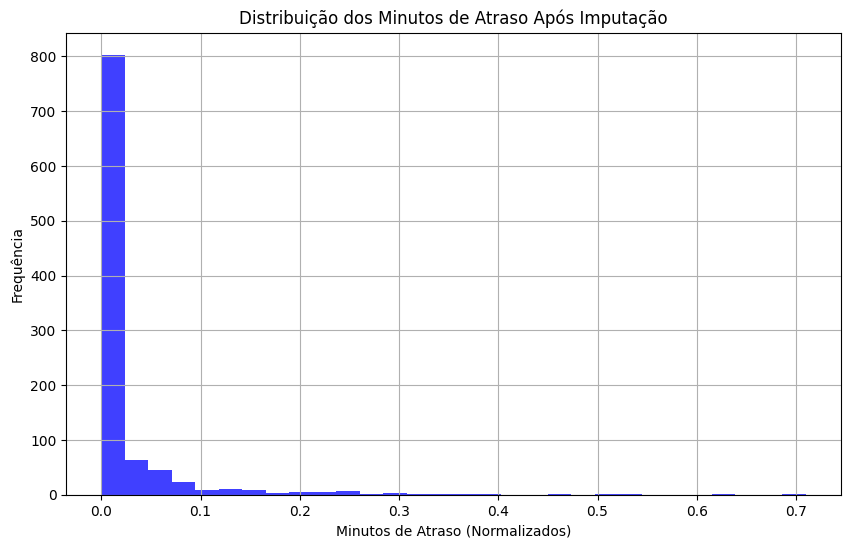

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(sampled_df['DepDelayMinutes'], bins=30, alpha=0.75, color='blue')
plt.title('Distribuição dos Minutos de Atraso Após Imputação')
plt.xlabel('Minutos de Atraso (Normalizados)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Com o histograma da amostra inputada com KNN, conseguimos analisar uma incrível semelhança com a distribuição dos dados pré-inputação

# Projeto 2

In [ ]:
# Início do projeto 2

# Filtragem de rotas

Na segunda parte do projeto, iremos
utilizar Regressão para predição do tempo de atraso dos voos. Para isso, analisaremos as rotas mais comuns de voos.

In [ ]:
voos_por_origem_dest = df_voos_realizados.groupby(['Origin', 'Dest']).size().reset_index(name='Count')

voos_por_origem_dest = voos_por_origem_dest.sort_values(by='Count', ascending=False)

In [ ]:
voos_por_origem_dest.head(10)

,Origin,Dest,Count
3609,LAX,SFO,9519
6256,SFO,LAX,9503
3561,LAX,LAS,8649
3439,LAS,LAX,8629
2728,HNL,OGG,8181
4620,OGG,HNL,8145
6114,SEA,PDX,7418
5038,PDX,SEA,7398
1744,DEN,PHX,7285
3877,MCO,ATL,7281


Assim, selecionamos as rotas Los angeles(LAX) --> São francisco(SFO) e Orlando(MCO) --> Atlanta(ATL)

In [ ]:
df_selected_routes = df_voos_realizados[
    ((df_voos_realizados['Origin'] == 'LAX') & (df_voos_realizados['Dest'] == 'SFO')) |
    ((df_voos_realizados['Origin'] == 'MCO') & (df_voos_realizados['Dest'] == 'ATL'))
]

In [ ]:
df_selected_routes.head(5)

,Airline,FlightDate,Month,DayofMonth,DayOfWeek,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes
16,SkyWest Airlines Inc.,2021-03-03,3,3,3,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0
32,SkyWest Airlines Inc.,2021-03-03,3,3,3,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0
295,SkyWest Airlines Inc.,2021-03-02,3,2,2,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0
311,SkyWest Airlines Inc.,2021-03-02,3,2,2,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0
539,SkyWest Airlines Inc.,2021-03-18,3,18,4,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",0.0


In [ ]:
df_selected_routes = df_selected_routes[df_selected_routes['DepDelayMinutes'] <= 500]

In [ ]:
# One-hot enconding das variáveis categóricas

In [ ]:
df_selected_routes = pd.get_dummies(df_selected_routes, columns=['Airline','Origin', 'Dest'], drop_first=True)

# Treinamento de modelos o com MLflow (Separação de dados)

Para a predição do tempo de atraso, decidimos utilizar Regressão Linear, Random Forest, Árvore de Decisão para Regressão e Gradient Boosting.

In [ ]:
!pip install mlflow

In [ ]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Flight Delay Prediction")

2024/07/07 18:28:21 INFO mlflow.tracking.fluent: Experiment with name 'Flight Delay Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/727814640238999239', creation_time=1720376901962, experiment_id='727814640238999239', last_update_time=1720376901962, lifecycle_stage='active', name='Flight Delay Prediction', tags={}>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_selected_routes.drop(['DepDelayMinutes', 'FlightDate', 'OriginCityName', 'DestCityName'], axis=1)
y = df_selected_routes['DepDelayMinutes']

# Divisão dos dados
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Normalizando as features
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Definição e treinamento dos modelos com seleção de hiper-parametros

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Definição de modelos
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Parâmetros para GridSearchCV
param_grids = {
    "Linear Regression": {
        'fit_intercept': [True, False]
    },
    "Decision Tree": {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}
best_models = {}
mse_scores = {}

# Treinamento e rastreamento com MLFlow
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_val_scaled, y_train_val)

        best_model = grid_search.best_estimator_
        best_models[name] = best_model

        # Previsões e avaliação
        y_val_pred = best_model.predict(X_val_scaled)
        mse = mean_squared_error(y_val, y_val_pred)
        mse_scores[name] = mse

        # Logar parâmetros, métricas e modelo no MLFlow
        mlflow.log_param("model", name)
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("mse", mse)
        mlflow.sklearn.log_model(best_model, "model")

        print(f"{name} Best Parameters: {grid_search.best_params_}")
        print(f"{name} Validation Mean Squared Error: {mse}")


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Linear Regression Best Parameters: {'fit_intercept': True}
Linear Regression Validation Mean Squared Error: 1143.060317191387
Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Validation Mean Squared Error: 1089.7729286587014
Random Forest Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Validation Mean Squared Error: 913.6364828531318
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Gradient Boosting Validation Mean Squared Error: 951.915028833146


Analisando as respostas, temos como melhor modelo o Random Forest

In [ ]:
best_model_name = min(mse_scores, key=mse_scores.get)
best_model = best_models[best_model_name]

print(f"Best Model: {best_model_name}")

Best Model: Random Forest


Best Model Test Mean Squared Error: 1178.7493374361227


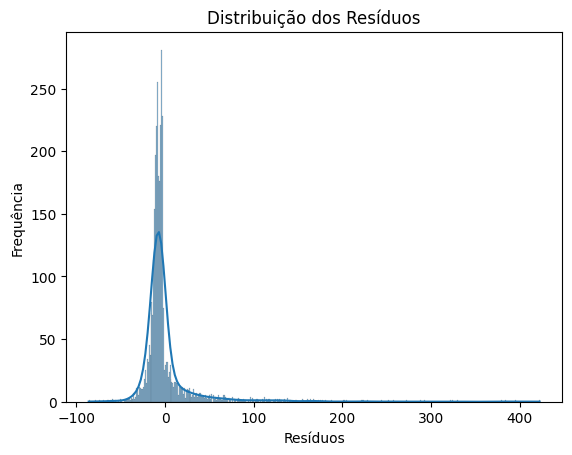

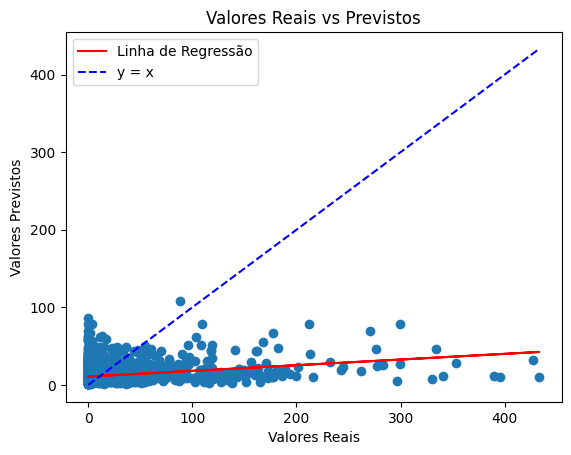

In [ ]:
# Fazer previsões no conjunto de teste com o melhor modelo
y_test_pred = best_model.predict(X_test_scaled)

# Calcular o MSE no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Best Model Test Mean Squared Error: {test_mse}")

# Diagnóstico do melhor modelo

# Resíduos
residuos = y_test - y_test_pred
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Valores Reais VS Previstos
plt.scatter(y_test, y_test_pred)
plt.title('Valores Reais vs Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')

# Linha de regressão
coef = np.polyfit(y_test, y_test_pred, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(y_test, poly1d_fn(y_test), color='red', label='Linha de Regressão')

# Plotar a linha y=x como referência
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='y = x')

plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Fazer previsões no conjunto de teste com o melhor modelo
y_test_pred = best_model.predict(X_test_scaled)

# Calcular o MSE no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Best Model Test Mean Squared Error: {test_mse}")

# Função para calcular e exibir métricas
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Previsões
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Cálculo das métricas
    metrics = {
        "MAE": {
            "train": mean_absolute_error(y_train, y_train_pred),
            "val": mean_absolute_error(y_val, y_val_pred),
            "test": mean_absolute_error(y_test, y_test_pred)
        },
        "RMSE": {
            "train": np.sqrt(mean_squared_error(y_train, y_train_pred)),
            "val": np.sqrt(mean_squared_error(y_val, y_val_pred)),
            "test": np.sqrt(mean_squared_error(y_test, y_test_pred))
        },
        "R²": {
            "train": r2_score(y_train, y_train_pred),
            "val": r2_score(y_val, y_val_pred),
            "test": r2_score(y_test, y_test_pred)
        }
    }

    return metrics

# Avaliação do modelo selecionado
metrics_best_model = evaluate_model(best_model, X_train_scaled, y_train, X_val_scaled, y_val, X_test_scaled, y_test)

print(f"Metrics for the Best Model ({best_model_name}):")
print("Train - MAE:", metrics_best_model["MAE"]["train"], "RMSE:", metrics_best_model["RMSE"]["train"], "R²:", metrics_best_model["R²"]["train"])
print("Validation - MAE:", metrics_best_model["MAE"]["val"], "RMSE:", metrics_best_model["RMSE"]["val"], "R²:", metrics_best_model["R²"]["val"])
print("Test - MAE:", metrics_best_model["MAE"]["test"], "RMSE:", metrics_best_model["RMSE"]["test"], "R²:", metrics_best_model["R²"]["test"])


Best Model Test Mean Squared Error: 1178.7493374361227
Metrics for the Best Model (Random Forest):
Train - MAE: 14.415107270695374 RMSE: 29.23708243799152 R²: 0.18633964368016065
Validation - MAE: 14.838439906712065 RMSE: 30.226420278510187 R²: 0.2230596385993745
Test - MAE: 16.41058924944092 RMSE: 34.33291915110224 R²: 0.08055254447557969


Conclusões das Métricas: MAE e RMSE tem um leve aumento no conjuto de teste. R2 score é baixo em todos os conjuntos. Concluímos que o modelo pode ter Underfitting.

## Diagnóstico do Random Forest

Os gráficos plotados nessa seção acusam inadequações do modelo escolhido, o Random Forest, acusando a existência de um underfitting. No primeiro gráfico, "Distribuição dos resíduos", a concetentração de resíduos em torno do 0 no eixo X indica uma precisão razoável do modelo, porém a assimetria em direação ao lado direito reflete uma possível sub/superestimação de algumas respostas reais, com valores muito altos. O segundo gráfico, "Valores reais vs. Previstos", em sua forma ideal, os valores reais se distribuiriam em torno do eixo da função y=x (em azul) e a linha de regressão (em vermelho) se assemelharia a esta. Porém, percebemos que as previsões estão equivocadas, estando distribuídas na parte inferior esquerda do gráfico, sugerindo que o modelo é confiável para valores mais baixos, mas a medida que sofrem incremento, a previsão fica cada vez mais equívoca, possivelmente com a subestimação de valores elevados, ao se observar a inclinação limitada da linha de regressão.

Para atacar o underfitting do modelo, podemos aplicar algumas técnicas.